In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('llcp2020AttributeClean.csv',header = 0);
##df.sample(10)
df.dtypes

SEXVAR        int64
GENHLTH     float64
PHYSHLTH    float64
MENTHLTH    float64
CHECKUP1    float64
EXERANY2      int64
SLEPTIM1      int64
CVDINFR4    float64
CVDCRHD4      int64
CVDSTRK3      int64
ASTHMA3       int64
CHCSCNCR      int64
CHCOCNCR      int64
CHCCOPD2      int64
HAVARTH4      int64
ADDEPEV3      int64
CHCKDNY2      int64
DIABETE4      int64
DIABAGE3    float64
PREGNANT    float64
WEIGHT2       int64
HEIGHT3       int64
SMOKDAY2    float64
LASTSMK2    float64
USENOW3     float64
AVEDRNK3    float64
PDIABTST    float64
PREDIAB1    float64
INSULIN1    float64
BLDSUGAR    float64
FEETCHK3    float64
DOCTDIAB    float64
CHKHEMO3    float64
FEETCHK     float64
EYEEXAM1    float64
ECIGARET    float64
ECIGNOW     float64
_DRDXAR2    float64
_BMI5       float64
_BMI5CAT    float64
_SMOKER3      int64
_DRNKWK1      int64
dtype: object

In [ ]:
###pre_processing
df['SEXVAR'] = df.SEXVAR.astype('category')

In [ ]:
gen_col = df['GENHLTH']
gen_col.replace(to_replace = 2, value = 1, inplace=True)
gen_col.replace(to_replace = 3, value = 1, inplace=True)
gen_col.replace(to_replace = 4, value = 2, inplace=True)
gen_col.replace(to_replace = 5, value = 2, inplace=True)
gen_col.replace(to_replace = 2, value = 1, inplace=True)
gen_col.replace(to_replace = 7, value = np.NaN, inplace=True)
gen_col.replace(to_replace = 9, value = np.NaN, inplace=True)
df['GENHLTH'] = df.GENHLTH.astype('category')

In [ ]:
sleep_col = df['SLEPTIM1']
sleep_col.replace(to_replace = 77, value = sleep_col.mean(), inplace=True)
sleep_col.replace(to_replace = 77, value = sleep_col.mean(), inplace=True)

In [ ]:
chc_col = df['CHCSCNCR']
chc_col.replace(to_replace = 7, value = np.NaN, inplace=True)
chc_col.replace(to_replace = 9, value = np.NaN, inplace=True)
df['CHCSCNCR'] = df.CHCSCNCR.astype('category')

In [ ]:
dia_col = df['DIABETE4']
dia_col.replace(to_replace = 2, value = 1, inplace=True)
dia_col.replace(to_replace = 3, value = 0, inplace=True)
dia_col.replace(to_replace = 4, value = 0, inplace=True)

In [ ]:
preg_col = df['PREGNANT']
preg_col.replace(to_replace = 7, value = np.NaN, inplace=True)
preg_col.replace(to_replace = 9, value = np.NaN, inplace=True)
df['PREGNANT'] = df.PREGNANT.astype('category')

In [ ]:
bsl_col = df['PDIABTST']
bsl_col.replace(to_replace = 7, value = np.NaN, inplace=True)
bsl_col.replace(to_replace = 9, value = np.NaN, inplace=True)
df['PDIABTST'] = df.PDIABTST.astype('category')

In [ ]:
pre_col = df['PREDIAB1']
pre_col.replace(to_replace = 7, value = np.NaN, inplace=True)
pre_col.replace(to_replace = 9, value = np.NaN, inplace=True)
df['PREDIAB1'] = df.PREDIAB1.astype('category')

In [ ]:
smo_col = df['_SMOKER3']
smo_col.replace(to_replace = 2, value = 1, inplace=True)
smo_col.replace(to_replace = 3, value = 2, inplace=True)
smo_col.replace(to_replace = 4, value = 3, inplace=True)
df['_SMOKER3'] = df._SMOKER3.astype('category')

In [ ]:
df = df[['SEXVAR','GENHLTH','SLEPTIM1','DIABETE4','CHCSCNCR','PREGNANT','PDIABTST','PREDIAB1','_SMOKER3','AVEDRNK3','WEIGHT2','HEIGHT3']]

In [ ]:
df = df.sample(n=10000)
x=df[['SEXVAR','GENHLTH','SLEPTIM1','CHCSCNCR','PREGNANT','PDIABTST','PREDIAB1','_SMOKER3','AVEDRNK3','WEIGHT2','HEIGHT3']]
y=df['DIABETE4']
testSetSize=0.20
seed=7
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=testSetSize,random_state=seed)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


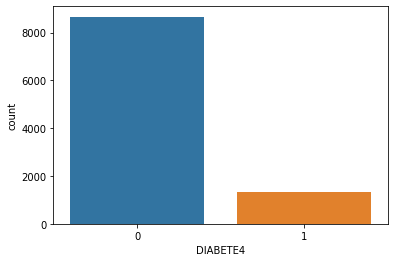

In [ ]:
sns.countplot(df["DIABETE4"])

In [ ]:
df.describe


<bound method NDFrame.describe of        SEXVAR GENHLTH  SLEPTIM1  DIABETE4 CHCSCNCR PREGNANT PDIABTST PREDIAB1  \
216032      1     1.0       7.0         0      2.0      NaN      2.0      3.0   
27069       2     1.0       8.0         0      2.0      NaN      NaN      NaN   
280392      1     1.0       7.0         0      2.0      NaN      NaN      NaN   
295802      2     1.0       7.0         0      2.0      NaN      NaN      NaN   
17157       2     1.0       8.0         0      2.0      2.0      1.0      3.0   
...       ...     ...       ...       ...      ...      ...      ...      ...   
159778      1     1.0       8.0         0      2.0      NaN      NaN      NaN   
5210        2     1.0       8.0         0      2.0      2.0      2.0      3.0   
268         1     1.0       3.0         0      2.0      NaN      2.0      3.0   
317386      1     1.0       8.0         0      2.0      NaN      1.0      3.0   
116785      2     1.0       8.0         0      2.0      2.0      1.0      1

In [ ]:
df.replace(np.NaN,0)


,SEXVAR,GENHLTH,SLEPTIM1,DIABETE4,CHCSCNCR,PREGNANT,PDIABTST,PREDIAB1,_SMOKER3,AVEDRNK3,WEIGHT2,HEIGHT3
216032,1,1.0,7.0,0,2.0,NaN,2.0,3.0,3,1.0,185,601
27069,2,1.0,8.0,0,2.0,NaN,NaN,NaN,3,0.0,125,502
280392,1,1.0,7.0,0,2.0,NaN,NaN,NaN,3,1.0,210,600
295802,2,1.0,7.0,0,2.0,NaN,NaN,NaN,3,0.0,220,509
17157,2,1.0,8.0,0,2.0,2.0,1.0,3.0,3,2.0,120,411
...,...,...,...,...,...,...,...,...,...,...,...,...
159778,1,1.0,8.0,0,2.0,NaN,NaN,NaN,2,0.0,170,507
5210,2,1.0,8.0,0,2.0,2.0,2.0,3.0,3,0.0,105,506
268,1,1.0,3.0,0,2.0,NaN,2.0,3.0,1,3.0,85,404
317386,1,1.0,8.0,0,2.0,NaN,1.0,3.0,3,2.0,235,511


In [ ]:
df=pd.read_csv('Cleaned.csv',header = 0);
df['GENHLTH'] = df.GENHLTH.astype('category')
df['PREDIAB1'] = df.PREDIAB1.astype('category')
df['CHCSCNCR'] = df.CHCSCNCR.astype('category')
df['PREGNANT'] = df.PREGNANT.astype('category')
df['PDIABTST'] = df.PDIABTST.astype('category')
df['_SMOKER3'] = df._SMOKER3.astype('category')
##df.sample(10)
df.dtypes

index          int64
SEXVAR         int64
GENHLTH     category
SLEPTIM1     float64
DIABETE4       int64
CHCSCNCR    category
PREGNANT    category
PDIABTST    category
PREDIAB1    category
_SMOKER3    category
AVEDRNK3     float64
WEIGHT2        int64
HEIGHT3        int64
dtype: object

In [ ]:
df = df.sample(n=10000)
x=df[['SEXVAR','GENHLTH','SLEPTIM1','CHCSCNCR','PREGNANT','PDIABTST','PREDIAB1','_SMOKER3','AVEDRNK3','WEIGHT2','HEIGHT3']]
y=df['DIABETE4']
testSetSize=0.30
seed=10
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=testSetSize,random_state=seed)

In [ ]:
#TO-DO 8: Add your code here
#LogisticRegression
LR=LogisticRegression(max_iter=1000)
LR.fit(x_train, y_train)
LR_prdict=LR.predict(x_test)
#DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT_prdict=DT.predict(x_test)
#GaussianNaiveBayes
NB=GaussianNB()
NB.fit(x_train, y_train)
NB_prdict=NB.predict(x_test)


In [ ]:
print("Accuracy of LR:",metrics.accuracy_score(y_test,LR_prdict))
print("Accuracy of DT:",metrics.accuracy_score(y_test,DT_prdict))
print("Accuracy of NB:",metrics.accuracy_score(y_test,NB_prdict))

Accuracy of LR: 0.8596666666666667
Accuracy of DT: 0.8326666666666667
Accuracy of NB: 0.7333333333333333


ROC-AUC Test Score 0.8479142240589302


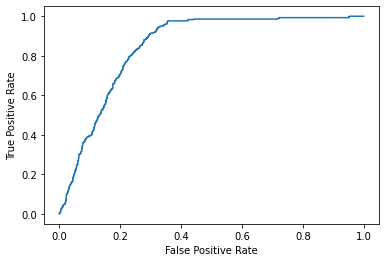

In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_proba = LR.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
ns_auc = roc_auc_score(y_test,  y_pred_proba)
print("ROC-AUC Test Score",ns_auc)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()



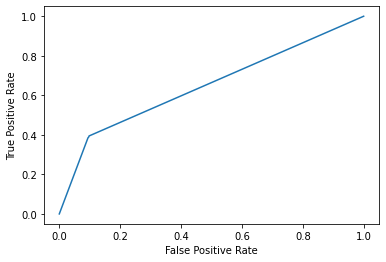

In [ ]:
y_pred_proba = DT.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



AttributeError: ignored